#Interpolación de Hermite
---
La interpolación de Hermite es un ejemplo de una variante del problema de interpolación, donde el interpolador coincide con una o más **derivadas de una función $f$** en cada uno de los nodos, además de los valores de la función.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from numpy.polynomial import Polynomial

## Componentes de la interpolación de Hermite

La idea es encontrar un polinomio que coincida con $f'(x_i)$ y $f(x_i)$ en los puntos $x_i = x_0,...,x_n$. Sea $(x_0, y_0), (x_1, y_1), x_2, y_2), ... (x_n, y_n)$ un conjunto de puntos tal que $y^{\prime}_{i}$ existe. Considere entonces al conjunto $(x_0, y_0 ^\prime ), (x_1, y_1 ^\prime ), x_2, y_2 ^\prime ),... ,(x_n, y_n ^\prime )$. Existen $2n + 2$ condiciones; $n+1$ para $f(x_i)$ más $n+1$ para $f'(x_i)$.

Forma general de los polinomios de Hermite de grado $2n+1$:

$$p_{2n+1} = \sum_{k=0}^{n} \left(f(x_k)h_k(x) + f'(x_k)\hat{h}_k(x)\right) \tag{1}$$

en dónde $h_k$ and $\hat{h}_k$ se definen usando las funciones base de Lagrangea:

$$h_k(x) = (1-2(x-x_k)l^\prime_k(x_k))l^2_k(x_k) \tag{2}$$

y,

$$\hat{h}_k(x) = (x-x_k)l^2_k(x_k) \tag{3}$$

where the Lagrange basis function being,

$$l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j} \tag{4}$$

**Note** que es posible escribir la ecuación $2$ como sigue,

\begin{align}
h_k(x) &= \left(1-2(x-x_k)l^\prime_k(x_k) \right)l^2_k(x_k) \\
&= \left(1 - 2xl^\prime_k(x_k) + 2x_kl^\prime_k(x_k) \right)l^2_k(x_k) \\
&= \left(1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x \right) l^2_k(x_k) \tag{5}
\end{align}

Reemplazando, $l^\prime_k(x_k)$ con $m$ obtenemos,
$$h_k(x) = (1 - 2xm + 2x_km)l^2_k(x_k) \tag{6}$$
    


.

### Método de Lagrange `l`: 


$$l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j} \tag{4}$$

In [2]:
def l(k, x):
    n = len(x)
    assert (k < len(x))
    
    x_k = x[k]
    x_copy = np.delete(x, k)
    
    den = np.prod(x_copy - x_k)
    
    coef = []
    
    for i in range(n):
        coef.append(sum([np.prod(x) for x in combinations(x_copy, i)]) * (-1)**(i) / den)
    
    coef.reverse()
    
    return Polynomial(coef)

### Método de Hermite `h`:

$$h_k(x) = \left(1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x \right) l^2_k(x_k) \tag{5}$$

Note que la ecuación $5$ es el producto de los polinomios:
 $$\left(1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x \right) \ \text{y} \ \ l^2_k(x_k).$$


La variable `coef` contiene una lista de coeficientes para el primer polinomio de la ecuación $5$. 

In [3]:
def h(k, x):
    # initialize with none
    l_k=None
    l_k_2=None
    l_k_der = None
    coef = None
    p = None
    l_k = l(k,x)
    l_k_2 = Polynomial.__pow__(l_k,2)#l_k**2
    l_k_der=Polynomial.deriv(l_k,1)
    #p=(1-(2*x*m)+(2*coeff*m))
    #p=Polynomial(np.array([1+2*x[k]*l_k_prime,(-2)*l_k_prime]))
    return Polynomial(np.array([1 + 2 * x[k] * l_k_der(x[k]), (-2) * l_k_der(x[k])])) * l_k_2 

### `h_hat`:

$$\hat{h}_k(x) = (x-x_k)l^2_k(x_k) \tag{3}$$

La ecuación $3$ es el producto de los polinomios:
$$(x-x_k) \ \  \text{y} \ \ l^2_k(x_k).$$

La variable `coef` contiene una lista de coeficientes para el primer polinomio de la ecuación $3$. 


In [4]:
def h_hat(k, x):
    l_k = None
    l_k_2 = None
    coef = None
    l_k = l(k, x)
    l_k_2 = Polynomial.__pow__(l_k,2)
    l_k = l(k, x)
    l_k_2 = l(k, x) * l(k, x)
    coef = np.array((-1) * x[k])
    #p = Polynomial(coef)
    return Polynomial(coef) * l_k_2 

### Polinomio de `Hermite`:


$$p_{2n+1} = \sum_{k=0}^{n} \left(f(x_k)h_k(x) + f'(x_k)\hat{h}_k(x)\right) \tag{1}$$

El polinomio de la ecuación $1$ se calcula a través de `f`.

In [7]:
def hermite(x, y, y_prime):
    assert( len(x) == len(y))
    assert( len(y) == len(y_prime))
    
    f = Polynomial([0.0])
    for i in range(len(x)):
      f+=(y[i]*h(i,x))+(y_prime[i]*h_hat(i,x))
    return f

## Ejemplos.

In [6]:
pi = np.pi
x       = np.array([0.0, pi/2.0,  pi, 3.0*pi/2.0])
y       = np.array([0.0,    1.0, 0.0,       -1.0])
y_prime = np.array([1.0,    0.0, 1.0,        0.0])

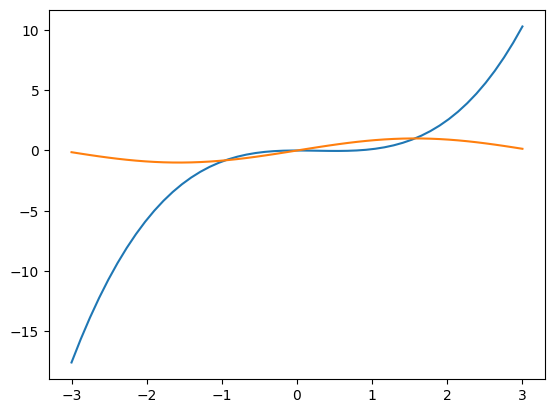

In [8]:
n = 1
f3     = hermite(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f3.linspace(n=50, domain=[-3, 3])
test_x = np.linspace(-3, 3, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

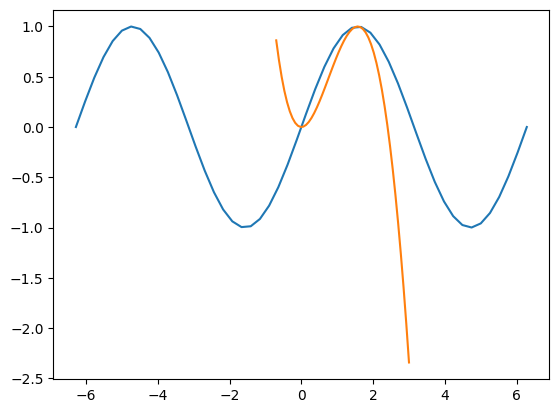

In [9]:
n = 2
f5     = hermite(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f5.linspace(n=50, domain=[-0.7, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(test_x, test_y)
plt.plot(data[0], data[1])
plt.show()

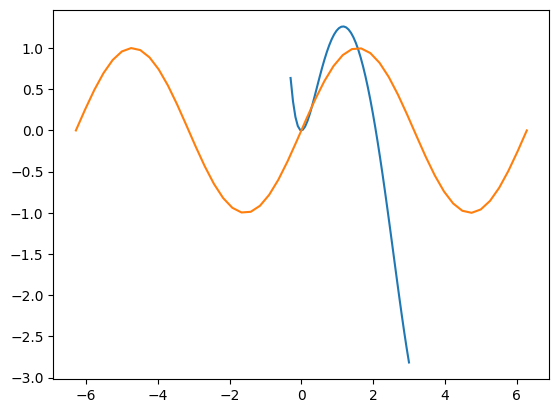

In [10]:
n = 3
f7     = hermite(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f7.linspace(n=50, domain=[-0.3, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()


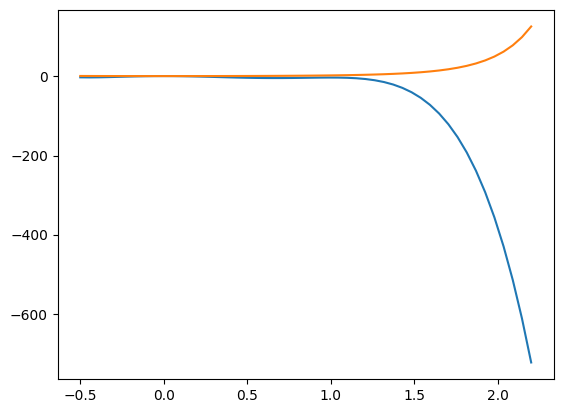

In [12]:

x       = np.array([0.0, 1.0,          2.0       ])
y       = np.array([1.0, 2.71828183,  54.59815003])
y_prime = np.array([0.0, 5.43656366, 218.39260013])


f7      = hermite( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-0.5, 2.2])
test_x  = np.linspace(-0.5, 2.2, 50, endpoint=True)
test_y  = np.exp(test_x**2)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

Interpolación para $y = (x-3)^2 + 1$ usando todos los nodos`x` y `y` y sus correspondientes derivadas `y_prime`.




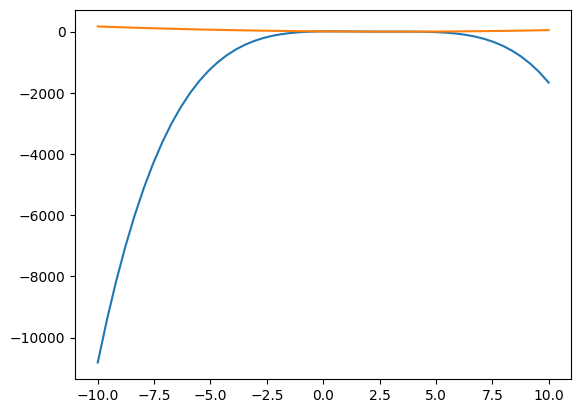

In [13]:
x       = np.array([1.0, 3.0, 5.0])
y       = np.array([5.0, 1.0, 5.0])
y_prime = np.array([-4.0, 0.0, 4.0])

f7      = hermite( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-10, 10])
test_x  = np.linspace(-10, 10, 50, endpoint=True)
test_y  = (test_x-3)**2 + 1

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()